# Importing the Libraries

In [118]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Framing the problem

The task at hand is to build a predictive model that utilizes the BMI feature to forecast the progression of diabetes. Our aim is to provide physicians with a screening tool that can assist them in identifying patients who are at risk of diabetes progression based on their BMI.

# Getting the data

In [119]:
from sklearn import datasets

# X contains all the features and y contains the target variable
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)


# Exploratory Data Analysis

## Exploring and Describing the data

Here we can see the general description of our data.

In [120]:
print(datasets.load_diabetes().DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Let us check out our features.

In [121]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


and a glance at our target

In [122]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

You can immediately observe that the `age`, `sex` and `bmi` columns have funny looking values. 

This is because in the description we were told that 

> Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1). 

So, this is why we cannot see the actual values for each column, but the good thing here is that the scaling of these values do not actually affect our prediction.



Let us perfrom some statistical calculation on our features.

In [123]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [124]:
y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

## Visualizing the Data

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'bp'}>, <Axes: title={'center': 's1'}>,
        <Axes: title={'center': 's2'}>],
       [<Axes: title={'center': 's3'}>, <Axes: title={'center': 's4'}>,
        <Axes: title={'center': 's5'}>],
       [<Axes: title={'center': 's6'}>, <Axes: >, <Axes: >]], dtype=object)

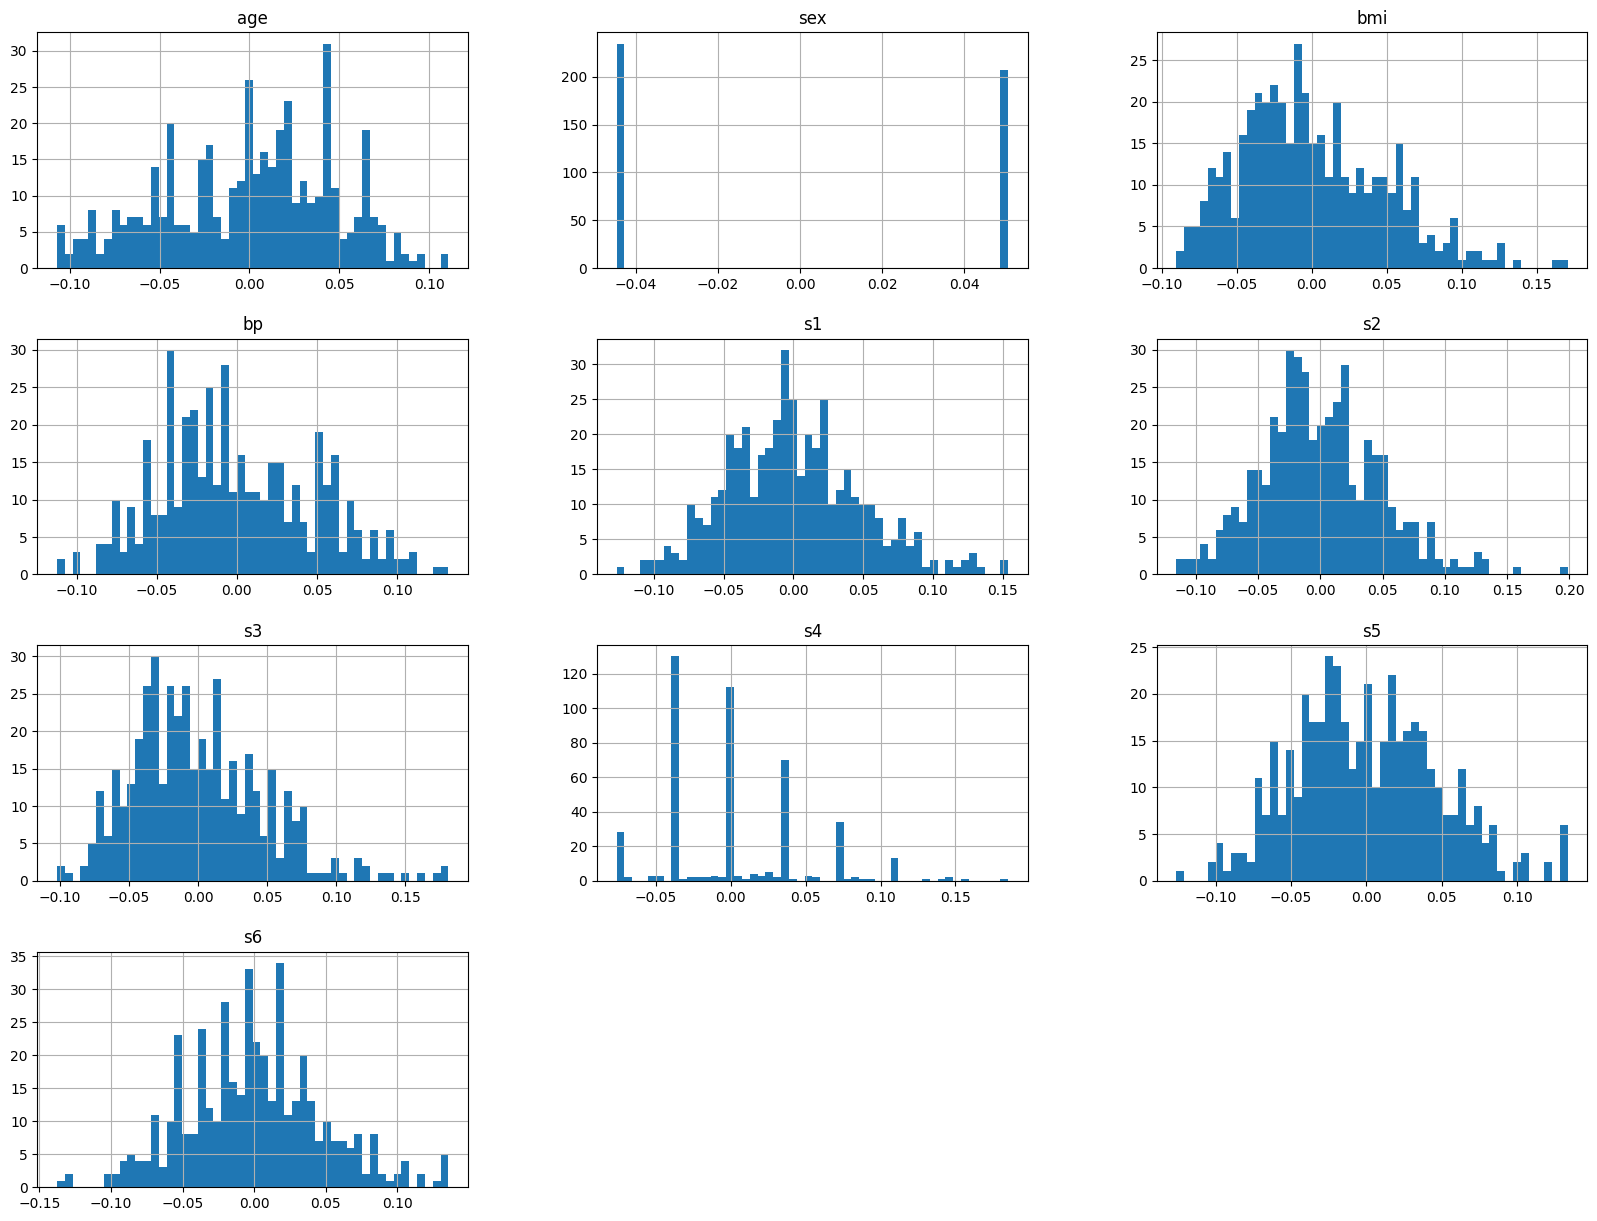

In [125]:
X.hist(bins=50,  figsize=(20, 15))

Text(0.5, 1.0, 'Disease Progression')

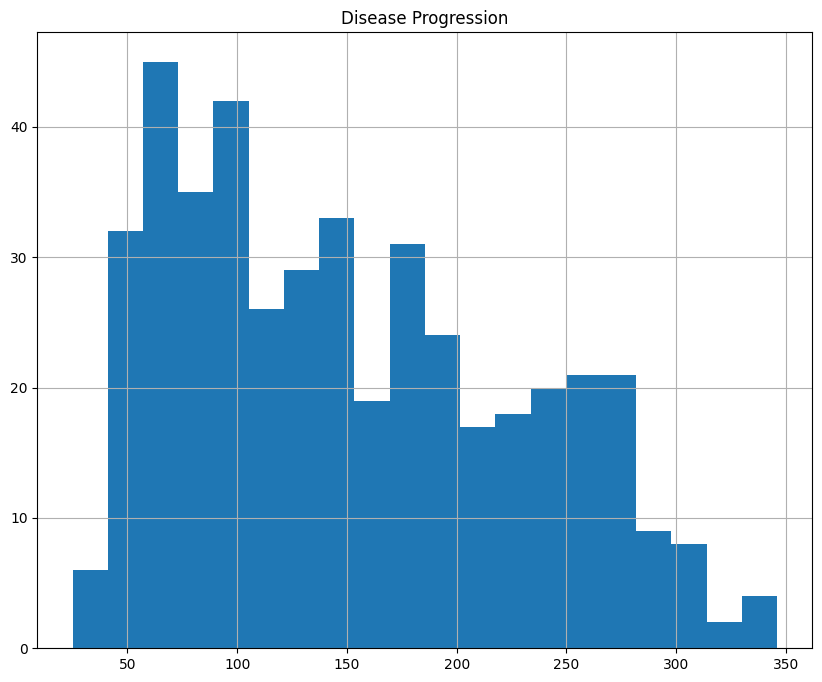

In [126]:
y.hist(bins=20, figsize=(10, 8))
plt.title('Disease Progression')

Let us do a small sneak peek into the relationship between some of our features and the target value.

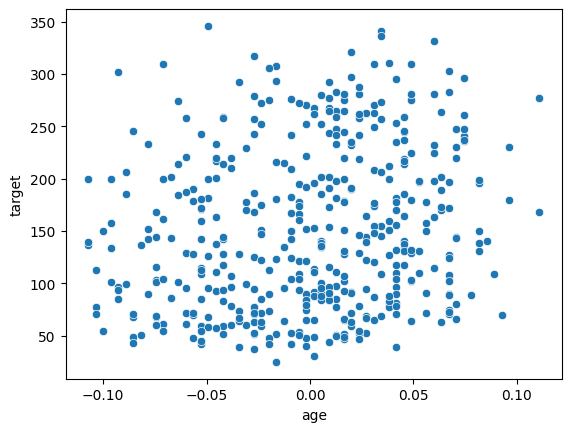

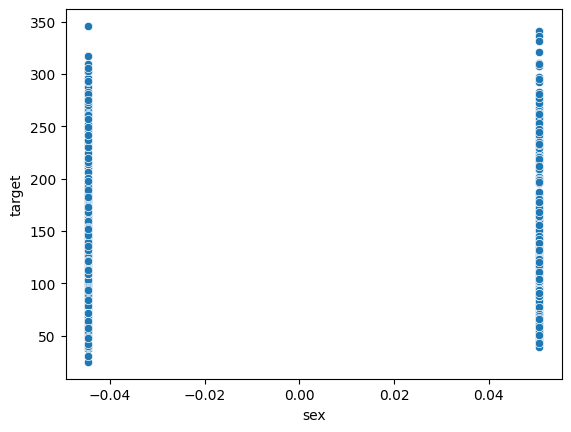

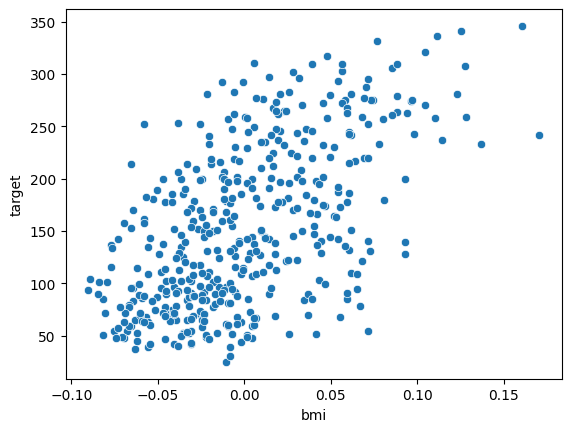

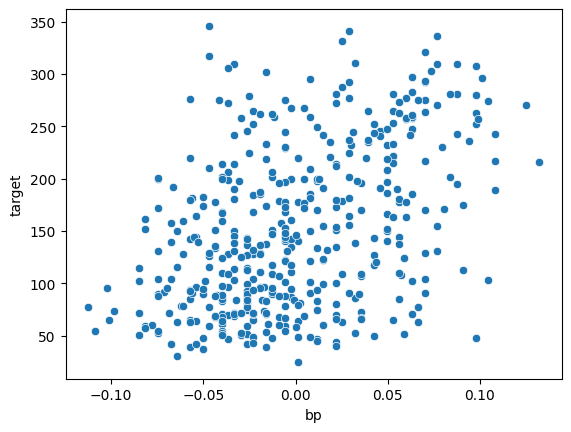

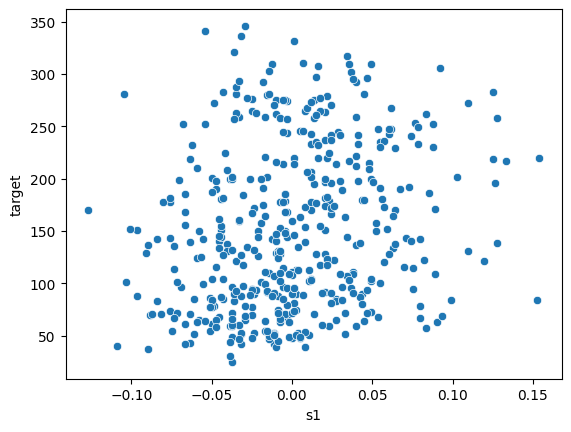

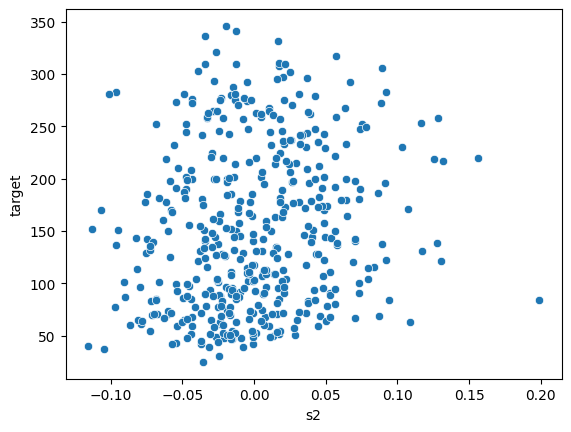

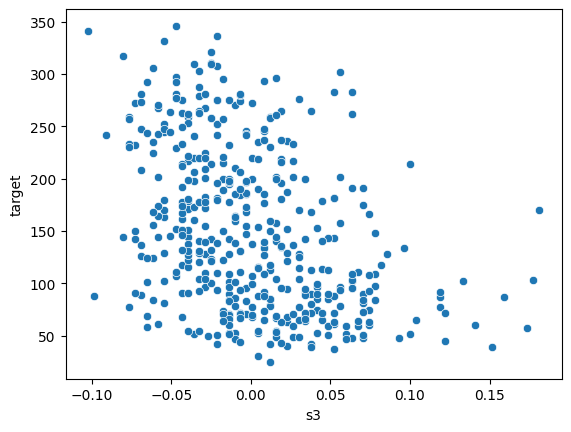

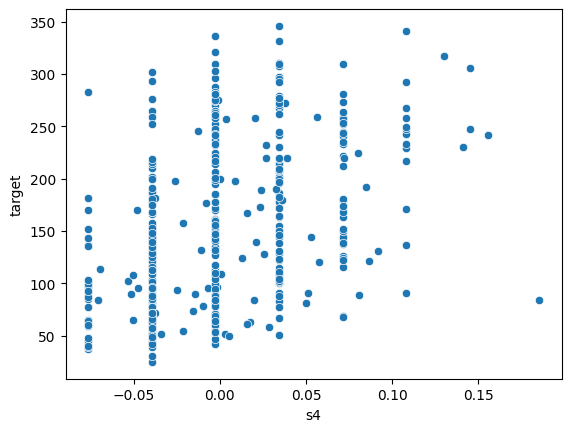

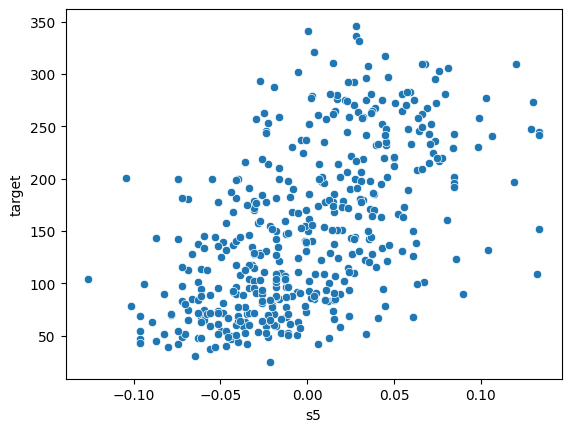

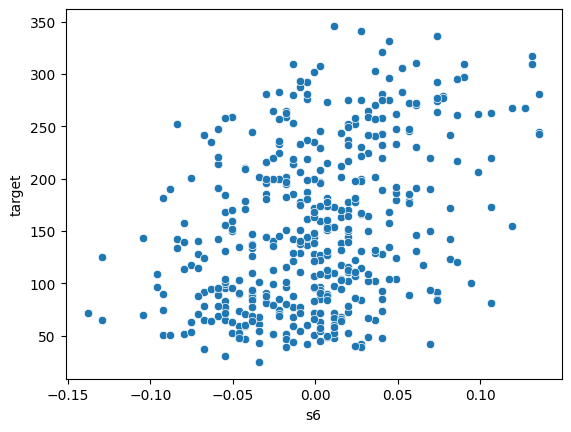

In [127]:
# use seaborn to plot a scatterplot of each of the features against the target variable
for i in range(X.shape[1]):
    sns.scatterplot(x=X.iloc[:, i], y=y)
    plt.show()

With just a eye test, I would say that the features that show some significance positive correlation with our target variable are `bmi`, `s1` and `s5`. I would say maybe even `s5` the most.

For the purpose of this analysis though, we will be focusing on the BMI feature.

<Axes: xlabel='bmi', ylabel='target'>

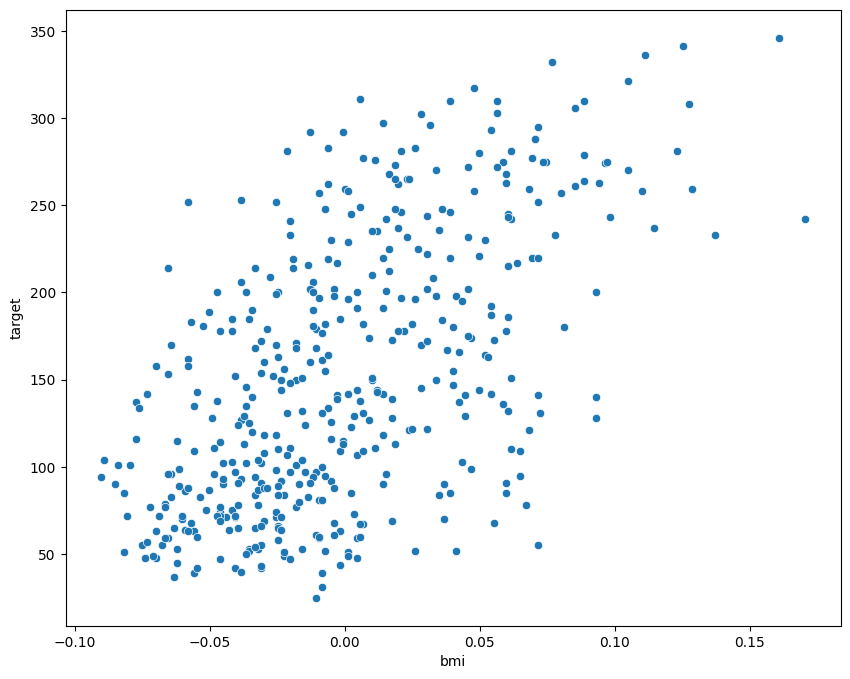

In [128]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X.iloc[:, 2], y=y)

# Data Preprocessing

To clean up our data, we check if we have any rows with a missing or null value or any outliers that could skew our data.

In [129]:
X.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [130]:
y.isnull().sum()

0

All our rows are intact in the features, notably the `bmi` column and in our target variable and also no obvious outliers as well so we are good to go.

# Splitting the Data

Splitting the data into training, validation and test sets, using 70%, 15% and 15% respectively.

In [131]:
# Calculate the sizes of the splits
train_size = int(len(X) * 0.7)
valid_size = int(len(X) * 0.15)


from sklearn.model_selection import train_test_split

# # First, split the data into 70% training and 30% temporary
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# # Then, split the temporary set into 50% validation and 50% testing
# # 50% of 30% is 15%, so you get 15% validation and 15% testing
# X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = X[:train_size]
X_valid = X[train_size:train_size + valid_size]
X_test = X[train_size + valid_size:]

In [132]:
#print the sizes of the splits
print(X_train.shape, X_valid.shape, X_test.shape)

(309, 10) (66, 10) (67, 10)


and similarly, for our target.

In [133]:
y_train = y[:train_size]
y_valid = y[train_size:train_size + valid_size]
y_test = y[train_size + valid_size:]

In [134]:
#print the sizes of the splits
print(y_train.shape, y_valid.shape, y_test.shape)

(309,) (66,) (67,)


# Polynomial Regression

We will only be using the `bmi` feature for our univariate regression.

In [135]:
X_train_bmi = X_train[['bmi']]
X_valid_bmi = X_valid[['bmi']]
X_test_bmi = X_test[['bmi']]

In [136]:
# Initialize metrics storage
performance_metrics = []

# Run polynomial regression for degrees 0 to 5
for degree in range(6):
    poly = PolynomialFeatures(degree=degree)
    
    X_train_poly = poly.fit_transform(X_train_bmi)
    X_valid_poly = poly.transform(X_valid_bmi)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict and calculate metrics
    y_train_pred = model.predict(X_train_poly)
    y_valid_pred = model.predict(X_valid_poly)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_valid = r2_score(y_valid, y_valid_pred)
    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_valid = mean_absolute_error(y_valid, y_valid_pred)
    
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    mape_valid = mean_absolute_percentage_error(y_valid, y_valid_pred)
    
    performance_metrics.append([degree, r2_train, r2_valid, mae_train, mae_valid, mape_train, mape_valid])

# Model Comparison

## Perfromance Metrics Report

In this section, we will compare the **R-sqaured** value, **Mean Absolute Percentage Error**, **Mean Absolute Error** among the six models using the training and validation data.

In [137]:
# Convert metrics to DataFrame
performance_metrics_df = pd.DataFrame(performance_metrics, columns=['degree', 'r2_train', 'r2_valid', 'mae_train', 'mae_valid', 'mape_train', 'mape_valid'])
performance_metrics_df

,degree,r2_train,r2_valid,mae_train,mae_valid,mape_train,mape_valid
0,0,0.000000,-0.068439,65.699521,62.195695,0.628501,0.442664
1,1,0.339150,0.316800,52.196348,48.678836,0.488798,0.346110
2,2,0.343807,0.268752,51.801466,49.713014,0.484856,0.348150
3,3,0.344185,0.280718,51.719863,49.310149,0.483410,0.345558
4,4,0.346371,0.241135,51.607695,50.447371,0.481571,0.349072
5,5,0.346653,0.261460,51.591594,50.148180,0.481593,0.348106



| Degree (Model) | R-Squared (Train) | R-Squared (Validation) | Mean Absolute Error (Train) | Mean Absolute Error (Validation) | Mean Absolute Percentage Error (Train) (%) | Mean Absolute Percentage Error (Validation)  (%) |
|--------|-------------------|------------------------|------------------------------|----------------------------------|----------------------------------------|------------------------------------------|
| 0      | 0.000             | -0.068                 | 65.70                        | 62.20                             | 62.85                                  | 44.27                                   |
| 1      | 0.339             | 0.317                  | 52.20                        | 48.68                             | 48.88                                  | 34.61                                   |
| 2      | 0.344             | 0.269                  | 51.80                        | 49.71                             | 48.49                                  | 34.82                                   |
| 3      | 0.344             | 0.281                  | 51.72                        | 49.31                             | 48.34                                  | 34.56                                   |
| 4      | 0.346             | 0.241                  | 51.61                        | 50.45                             | 48.16                                  | 34.91                                   |
| 5      | 0.347             | 0.261                  | 51.59                        | 50.15                             | 48.16                                  | 34.81                                   |

The table shows the performance metrics for polynomial regression models of degrees 0 to 5.

## Conclusion

### Evaluating the best model

When evaluating the performance of these models, it's important to consider both the training and validation metrics. A model that performs well on the training data but poorly on the validation data is likely overfitting, meaning it's too complex.

Looking at the table, the model with degree 1 seems to perform the best overall. Here's why:

It has the highest R-squared value on the validation set (0.317), indicating it explains the most variance in the target variable compared to the other models.

It has the lowest Mean Absolute Error (MAE) on the validation set (48.68), indicating it makes the smallest average absolute prediction error.

It has the lowest Mean Absolute Percentage Error (MAPE) on the validation set (34.61), indicating it makes the smallest average relative prediction error.

While the degree 5 model performs slightly better on the training data according to all three metrics, its performance drops more on the validation set, suggesting it might be overfitting. The degree 1 model, on the other hand, seems to generalize better to new data, making it the best performer overall based on these metrics.

### Chosen Model on the test set

Our chosen model is the model of degree 1, which is our linear model (ironic, eh?)

Now, we have two ways we can do our linear model (degree 1)

First way is the way we have been doing it before now, using a linear regression directly.

In [138]:
linear_model = LinearRegression()

linear_model.fit(X_train_bmi, y_train)

y_pred_linear = linear_model.predict(X_test_bmi)

r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)

print(f"Linear Model R2 Score: {r2_linear}")
print(f"Linear Model MAE: {mae_linear}")
print(f"Linear Model MAPE: {mape_linear}")

Linear Model R2 Score: 0.3538523087303761
Linear Model MAE: 51.91205842533073
Linear Model MAPE: 0.5202865439563414


We also have the new method we just learnt, using a polynomial feature, with degree 1.

In [139]:
poly_features = PolynomialFeatures(degree=1)

x_train_poly = poly_features.fit_transform(X_train_bmi)
x_test_poly = poly_features.transform(X_test_bmi)

poly_model = LinearRegression()

poly_model.fit(x_train_poly, y_train)

y_pred_poly = poly_model.predict(x_test_poly)

r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly)

print(f"Polynomial Model (Degree 1) R2 Score: {r2_poly}")
print(f"Polynomial Model (Degree 1) MAE: {mae_poly}")
print(f"Polynomial Model (Degree 1) MAPE: {mape_poly}")

Polynomial Model (Degree 1) R2 Score: 0.3538523087303762
Polynomial Model (Degree 1) MAE: 51.91205842533073
Polynomial Model (Degree 1) MAPE: 0.5202865439563414


| Metric | Value |
| --- | --- |
| R<sup>2</sup> Score | 0.3538523087303761 |
| MAE | 51.91205842533073 |
| MAPE | 52.02865439563414 |

This table has two columns: "Metric" and "Value". Each row represents a different metric and its corresponding value.

As you can notice, the MAE and the R^2 value are the same.

### Graphing our data

**Train Data**

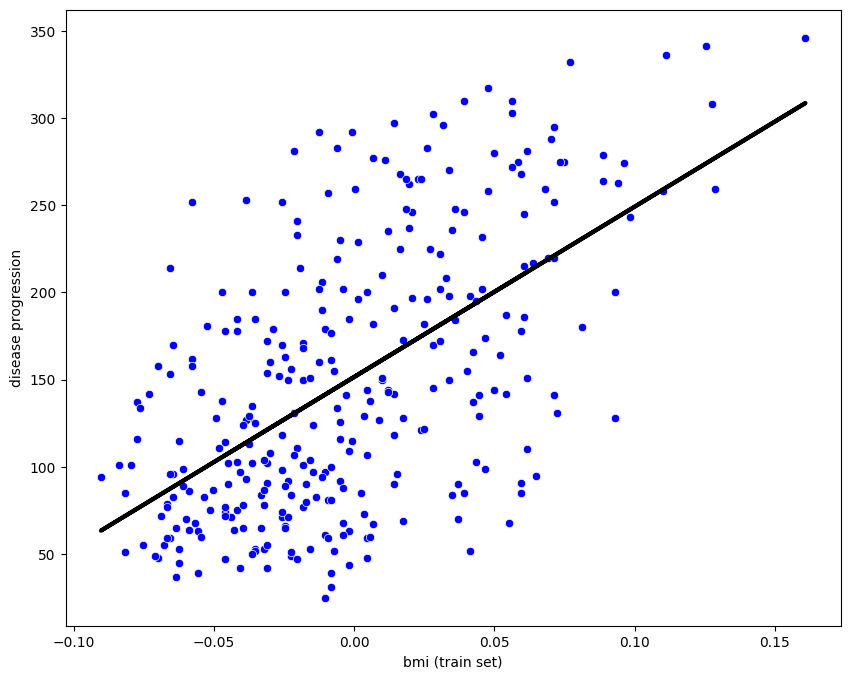

In [140]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_bmi.iloc[:, 0], y=y_train, color='blue')
plt.xlabel('bmi (train set)')
plt.ylabel('disease progression')
# Plot the linear model
plt.plot(X_train_bmi, linear_model.predict(X_train_bmi), color='black', linewidth=3)
plt.show()

**Validation Data**

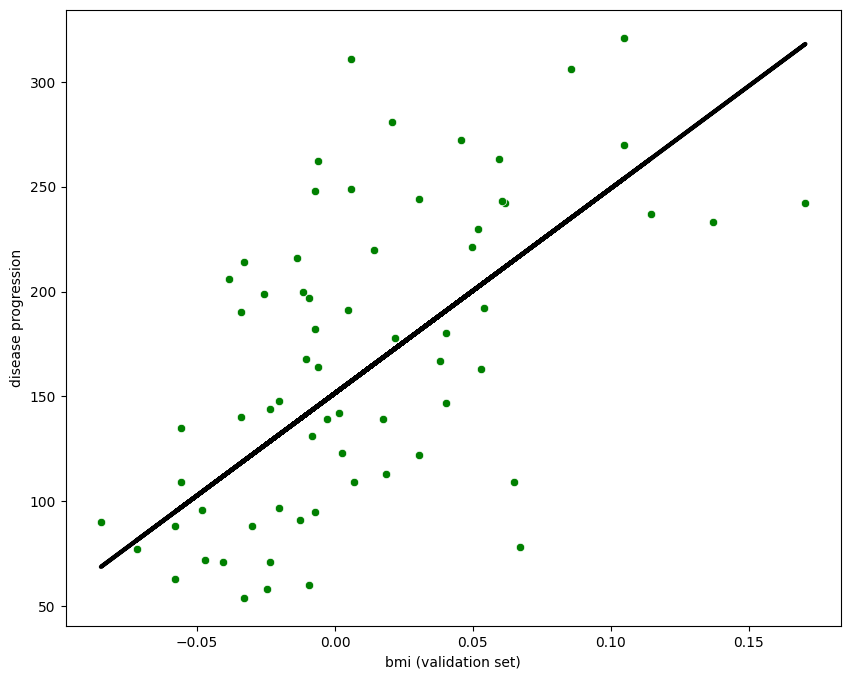

In [141]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_valid_bmi.iloc[:, 0], y=y_valid, color='green')
plt.xlabel('bmi (validation set)')
plt.ylabel('disease progression')
# Plot the linear model
plt.plot(X_valid_bmi, linear_model.predict(X_valid_bmi), color='black', linewidth=3)
plt.show()

**Test Data**

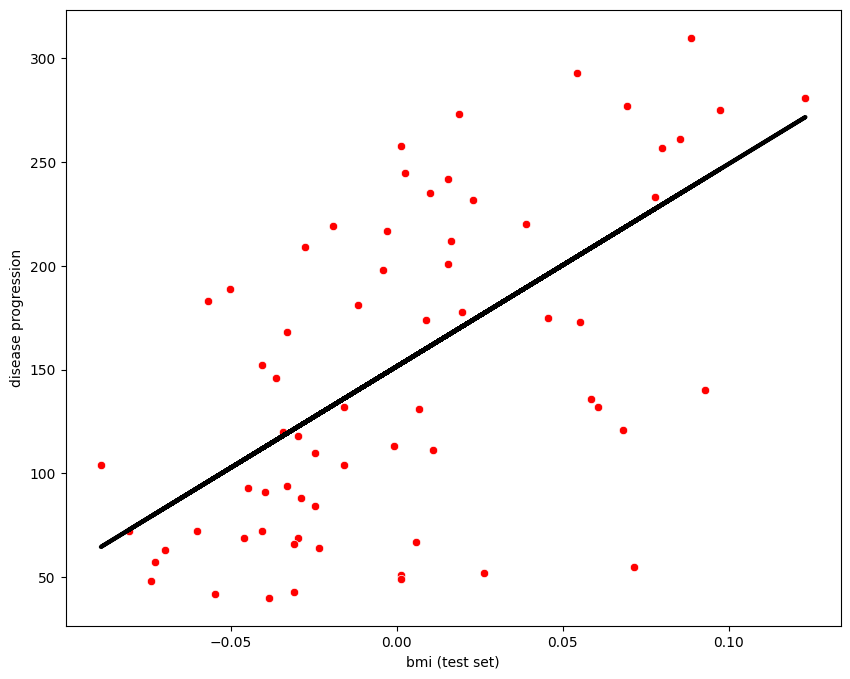

In [142]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_test_bmi.iloc[:, 0], y=y_test, color='red')
plt.xlabel('bmi (test set)')
plt.ylabel('disease progression')
# Plot the linear model
plt.plot(X_test_bmi, linear_model.predict(X_test_bmi), color='black', linewidth=3)
plt.show()

### Equation of our model

In [143]:
# write out the equation for the linear model
m = linear_model.coef_[0].round(2)
c = linear_model.intercept_.round(2)

# print the slope and the intercept separately
print(f"Slope: {m}")
print(f"Intercept: {c}")

print(f"Equation: y = {m} * x + {c}")

Slope: 976.11
Intercept: 151.55
Equation: y = 976.11 * x + 151.55


**Predicting diabetes progression for a BMI of my choice**

In [144]:
chosen_bmi = 0.05
bmi_df = pd.DataFrame([[chosen_bmi]], columns=['bmi'])
predicted_disease_progression = linear_model.predict(bmi_df)[0]
print(f"Predicted disease progression for bmi {chosen_bmi}: {predicted_disease_progression}")

Predicted disease progression for bmi 0.05: 200.35633555523708


and manually, 

In [145]:
976.11 * (0.05) + 151.55

200.3555

## Trainable Parameters

A trainable parameter is the number of features plus 1.

So, take for example:

In a linear model, our equation is y = m*x + c, where m is the slope of the line (coefficient) and c is the y-intercept (bias). Our model derives the values of m and c, so in this case, we have two trainable parameters.

In a polynomial of degree 3, our equation is y = a*x^3 + b*x^2 + c*x + d, where a, b, and c are the coefficients and d is the bias. Our model derives the values of a, b, c, and d. So, in this case, we have four trainable parameters.

We can also see this by doing:

In [146]:
for degree in range(6):
    poly = PolynomialFeatures(degree=degree)
    poly.fit_transform(X_train_bmi)
    print(f"The trainable parameters in this model --> {poly.get_feature_names_out().tolist()}")
    print(f"Number of trainable parameters in the model for degree {degree}: {len(poly.get_feature_names_out())} \n")
    

The trainable parameters in this model --> ['1']
Number of trainable parameters in the model for degree 0: 1 

The trainable parameters in this model --> ['1', 'bmi']
Number of trainable parameters in the model for degree 1: 2 

The trainable parameters in this model --> ['1', 'bmi', 'bmi^2']
Number of trainable parameters in the model for degree 2: 3 

The trainable parameters in this model --> ['1', 'bmi', 'bmi^2', 'bmi^3']
Number of trainable parameters in the model for degree 3: 4 

The trainable parameters in this model --> ['1', 'bmi', 'bmi^2', 'bmi^3', 'bmi^4']
Number of trainable parameters in the model for degree 4: 5 

The trainable parameters in this model --> ['1', 'bmi', 'bmi^2', 'bmi^3', 'bmi^4', 'bmi^5']
Number of trainable parameters in the model for degree 5: 6 



# Bonus

## Checking Out Model of Degree 5.

During the evaluattion of our model, we chose the model with degree 1 as the best performing model against our metrics. But we could also observe that the model of degree 5 did next best on our validation data, but it did even well on the training data.

In this section, we will plot the model of degree 5 against our data.

In [147]:
poly_features = PolynomialFeatures(degree=5)

x_train_poly = poly_features.fit_transform(X_train_bmi)
x_test_poly = poly_features.transform(X_test_bmi)


poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

y_pred_poly = poly_model.predict(x_test_poly)


r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly)

print(f"Polynomial Model (Degree 5) R2 Score: {r2_poly}")
print(f"Polynomial Model (Degree 5) MAE: {mae_poly}")
print(f"Polynomial Model (Degree 5) MAPE: {mape_poly}")

Polynomial Model (Degree 5) R2 Score: 0.3525292804307668
Polynomial Model (Degree 5) MAE: 51.81114543556179
Polynomial Model (Degree 5) MAPE: 0.5202362188374028


### Graphing

**Train Data**

c:\Users\Owner\Desktop\AIML\FoundationMachineLearningFramework\CSCN8010-Foundations-of-Machine-Learning\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


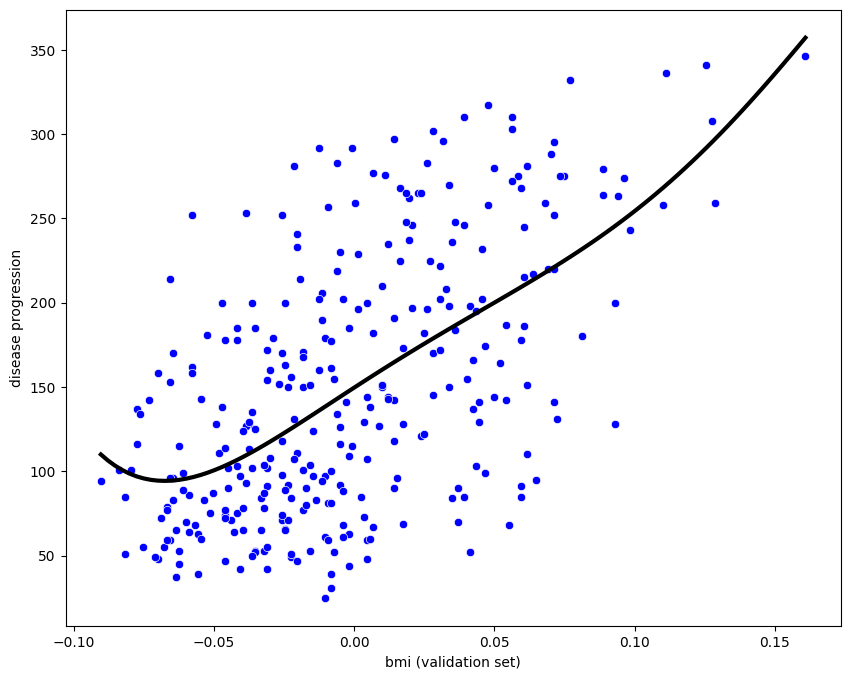

In [148]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_bmi.iloc[:, 0], y=y_train, color='blue')
plt.xlabel('bmi (validation set)')
plt.ylabel('disease progression')

# Create a range of x values for plotting
x_range = np.linspace(X_train_bmi.min(), X_train_bmi.max(), 100).reshape(-1, 1)

# Transform the x values using the PolynomialFeatures instance
x_range_poly = poly_features.transform(x_range)

# Predict the y values
y_range_poly = poly_model.predict(x_range_poly)

# Plot the polynomial model
plt.plot(x_range, y_range_poly, color='black', linewidth=3)

# plt.plot(X_train_bmi, poly_model.predict(poly_features.transform(X_train_bmi)), color='black', linewidth=3)


**Validation Data**

c:\Users\Owner\Desktop\AIML\FoundationMachineLearningFramework\CSCN8010-Foundations-of-Machine-Learning\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


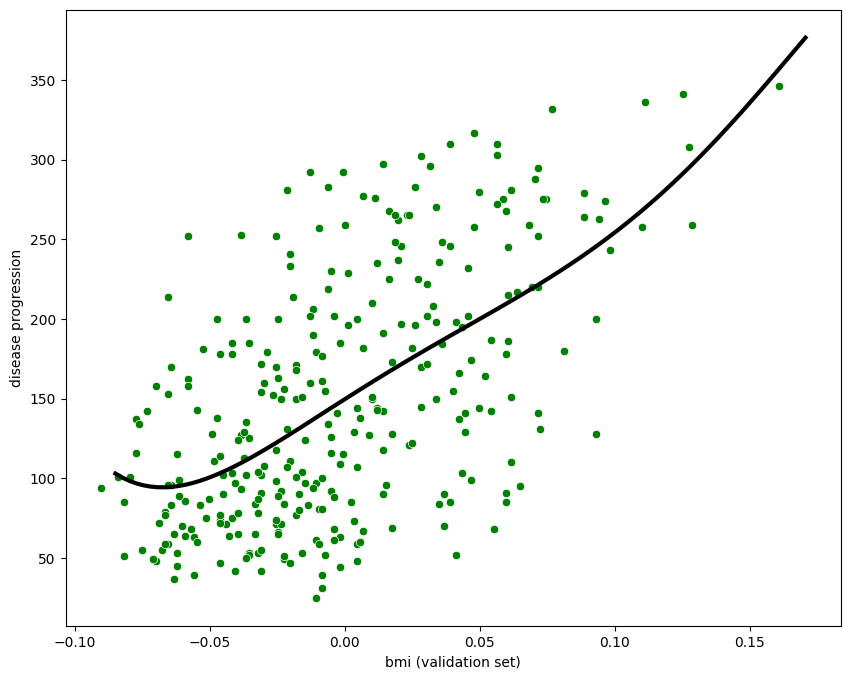

In [149]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_bmi.iloc[:, 0], y=y_train, color='green')
plt.xlabel('bmi (validation set)')
plt.ylabel('disease progression')

# Create a range of x values for plotting
x_range = np.linspace(X_valid_bmi.min(), X_valid_bmi.max(), 100).reshape(-1, 1)

# Transform the x values using the PolynomialFeatures instance
x_range_poly = poly_features.transform(x_range)

# Predict the y values
y_range_poly = poly_model.predict(x_range_poly)

# Plot the polynomial model
plt.plot(x_range, y_range_poly, color='black', linewidth=3)

# plt.plot(X_train_bmi, poly_model.predict(poly_features.transform(X_train_bmi)), color='black', linewidth=3)

# plt.plot(X_valid_bmi, poly_model.predict(poly_features.transform(X_valid_bmi)), color='black', linewidth=3)


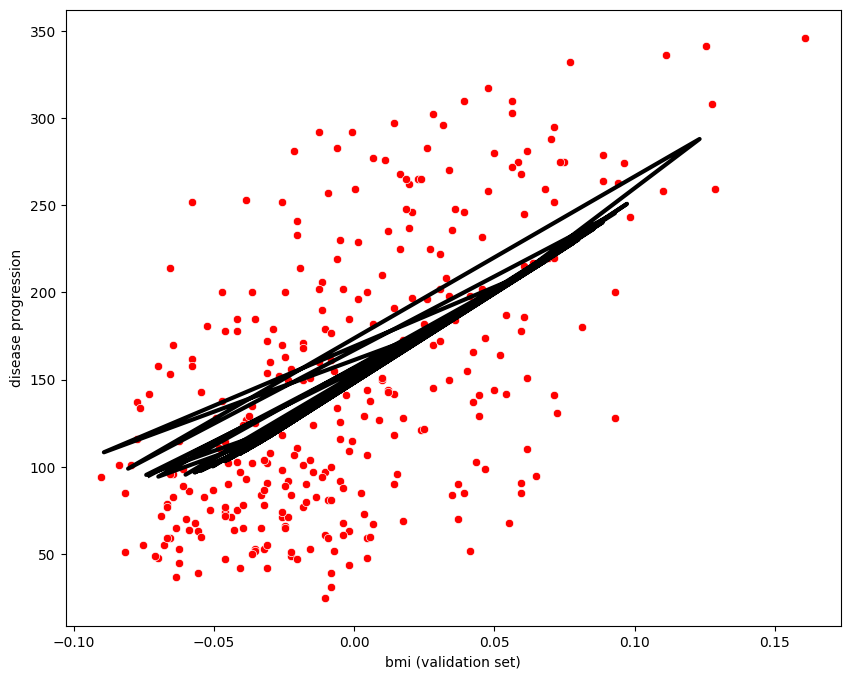

In [150]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_bmi.iloc[:, 0], y=y_train, color='red')
plt.xlabel('bmi (validation set)')
plt.ylabel('disease progression')
plt.plot(X_test_bmi, poly_model.predict(poly_features.transform(X_test_bmi)), color='black', linewidth=3)


Equation of the model

In [151]:
# Get the coefficients
coefficients = poly_model.coef_
intercept = poly_model.intercept_

# Print the equation
print(f"y = {intercept} ", end="")
for i in range(1, len(coefficients)):
    print(f"+ {coefficients[i]}*x^{i} ", end="")

y = 149.59312997905656 + 1079.395329627624*x^1 + -1044.9801246170787*x^2 + -29933.745441354353*x^3 + 526929.0516993523*x^4 + -1552935.7609337838*x^5 

y = 149.59312997905656 + 1079.395329627624*x^1 + -1044.9801246170787*x^2 + -29933.745441354353*x^3 + 526929.0516993523*x^4 + -1552935.7609337838*x^5 

**Predicting diabtest progression for a BMI of my choice.**

In [152]:
chosen_bmi = 0.05
bmi_df = pd.DataFrame([[chosen_bmi]], columns=['bmi'])
predicted_disease_progression = poly_model.predict(poly_features.transform(bmi_df))[0]
print(f"Predicted disease progression for bmi {chosen_bmi}: {predicted_disease_progression}")

Predicted disease progression for bmi 0.05: 200.01674211655492


and manually,

In [153]:
x = 0.05

y = 149.59312997905656 + 1079.395329627624*x + -1044.9801246170787*x**2 + -29933.745441354353*x**3 + 526929.0516993523*x**4 + -1552935.7609337838*x**5

print(f"The value of y when x = {x} is {y}")

The value of y when x = 0.05 is 200.01674211655492
